In [6]:
install.packages("lme4",
   repos=c("http://lme4.r-forge.r-project.org/repos",
      getOption("repos")[["CRAN"]]))

also installing the dependencies ‘nloptr’, ‘RcppEigen’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
install.packages("rlang")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(rlang)
sessionInfo() 

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.16

Matrix products: default
BLAS/LAPACK: /Users/faisal/opt/anaconda3/envs/r-tutorial/lib/R/lib/libRblas.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] rlang_0.4.11

loaded via a namespace (and not attached):
 [1] compiler_3.6.1  IRdisplay_0.7.0 pbdZMQ_0.3-3    tools_3.6.1    
 [5] htmltools_0.3.6 base64enc_0.1-3 crayon_1.4.1    Rcpp_1.0.1     
 [9] uuid_0.1-2      IRkernel_0.8.15 jsonlite_1.7.2  digest_0.6.18  
[13] repr_0.19.2     evaluate_0.13  

In [58]:
install.packages("tidyverse")

also installing the dependencies ‘bit’, ‘fs’, ‘rappdirs’, ‘bit64’, ‘progress’, ‘processx’, ‘xfun’, ‘blob’, ‘data.table’, ‘gargle’, ‘ids’, ‘rematch2’, ‘isoband’, ‘vroom’, ‘tzdb’, ‘callr’, ‘knitr’, ‘withr’, ‘broom’, ‘cli’, ‘crayon’, ‘dbplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘ggplot2’, ‘haven’, ‘hms’, ‘httr’, ‘jsonlite’, ‘lubridate’, ‘modelr’, ‘purrr’, ‘readr’, ‘reprex’, ‘rstudioapi’, ‘rvest’, ‘tidyr’, ‘xml2’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [36]:
install.packages("ggeffects")

also installing the dependencies ‘insight’, ‘sjlabelled’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%@%()         masks rlang::%@%()
✖ purrr::as_function() masks rlang::as_function()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks rlang::flatten()
✖ purrr::flatten_chr() masks rlang::flatten_chr()
✖ purrr::flatten_dbl() masks rlang::flatten_dbl()
✖ purrr::flatten_int() masks rlang::flatten_int()
✖ purrr::flatten_lgl() masks rlang::flatten_lgl()
✖ purrr::flatten_raw() masks rlang::flatten_raw()
✖ purrr::invoke()      masks rlang::invoke()
✖ dplyr::lag()         masks stats::lag()
✖ purrr::list_along()  masks rlang::list_along()
✖ purrr::modify()      masks rlang::modify()
✖ purrr::prepend()     masks rlang::prepend()
✖ purrr::splice()      masks rlang

In [5]:
library("ggplot2")
library("lme4")

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



## loading data

In [6]:
data <- read.csv('../asr_metadata/dev/all_dev.csv')

In [7]:
dim(data)

[1] 34985    18

## The model

In [8]:
mixed.lmer <- lmer(min_f1 ~ wer + (1 + wer | language/region), data=data)
summary(mixed.lmer)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML ['lmerMod']
Formula: min_f1 ~ wer + (1 + wer | language/region)
   Data: data

REML criterion at convergence: -79439.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0700 -0.6939  0.2028  0.8316  1.6669 

Random effects:
 Groups          Name        Variance  Std.Dev. Corr
 region:language (Intercept) 1.454e-05 0.003813     
                 wer         2.272e-06 0.001507 1.00
 language        (Intercept) 3.087e-03 0.055565     
                 wer         8.183e-06 0.002861 0.91
 Residual                    6.031e-03 0.077657     
Number of obs: 34985, groups:  region:language, 24; language, 5

Fixed effects:
             Estimate Std. Error t value
(Intercept)  0.180573   0.024887   7.256
wer         -0.003513   0.002301  -1.527

Correlation of Fixed Effects:
    (Intr)
wer 0.493 
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


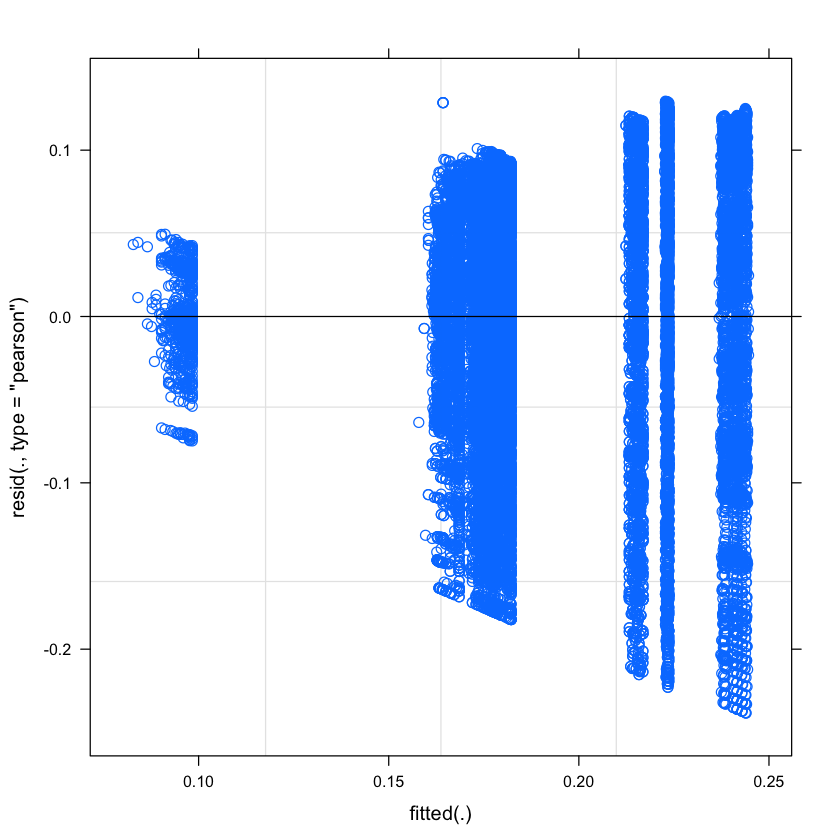

In [9]:
plot(mixed.lmer)

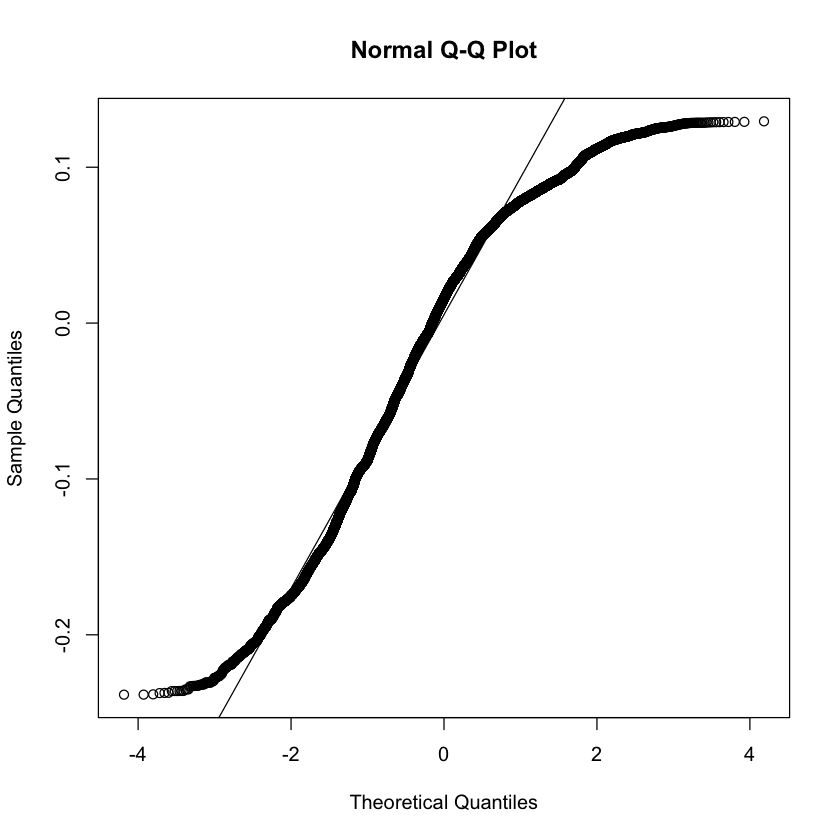

In [10]:
qqnorm(resid(mixed.lmer))
qqline(resid(mixed.lmer))  # points fall nicely onto the line - good!

we can see the slops are not parallel, so wer does not affect min_f1 score while considering different language has different basdeline 

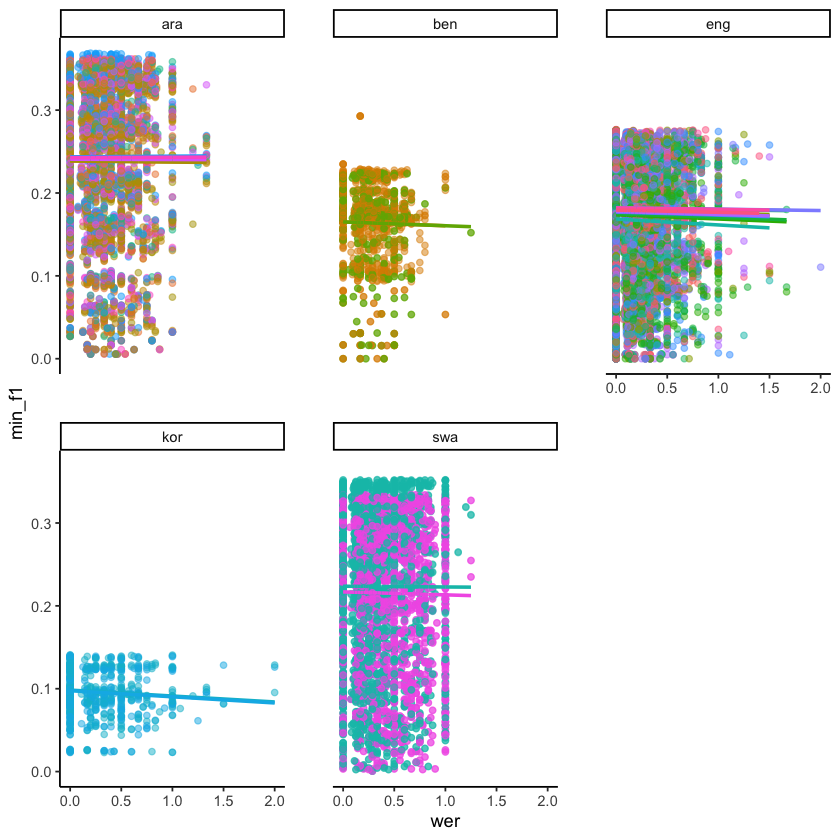

In [11]:
(mm_plot <- ggplot(data, aes(x = wer, y = min_f1, colour = region)) +
      facet_wrap(~language, nrow=2) +   # a panel for each mountain range
      geom_point(alpha = 0.5) +
      theme_classic() +
      geom_line(data = cbind(data, pred = predict(mixed.lmer)), aes(y = pred), size = 1) +  # adding predicted line from mixed model 
      theme(legend.position = "none",
            panel.spacing = unit(2, "lines"))  # adding space between panels
)

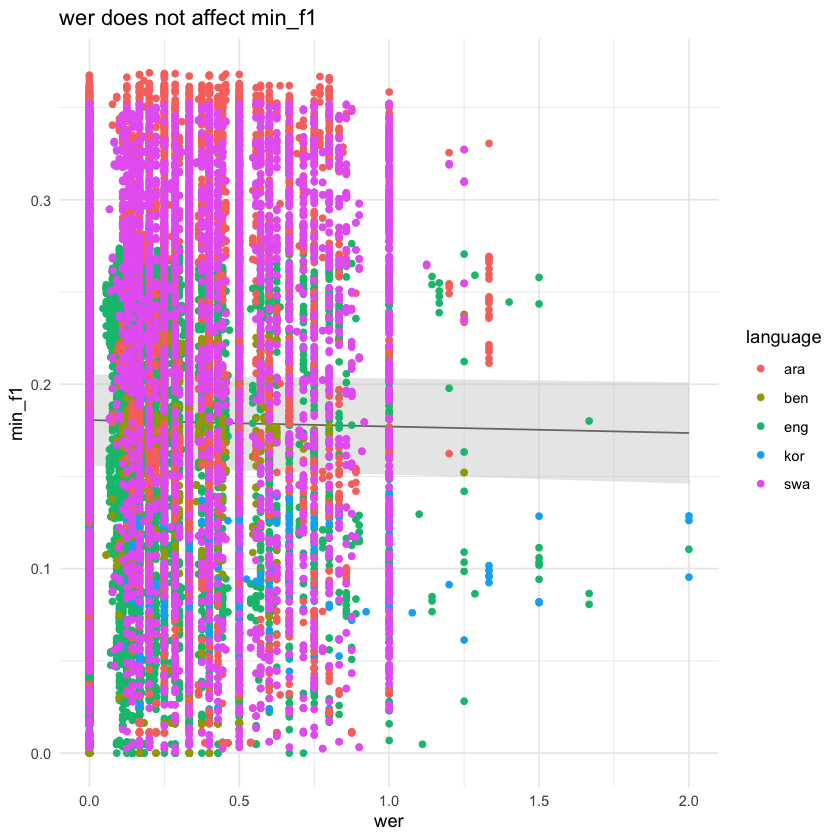

In [12]:
library(ggeffects)  # install the package first if you haven't already, then load it

# Extract the prediction data frame
pred.mm <- ggpredict(mixed.lmer, terms = c("wer"))  # this gives overall predictions for the model

# Plot the predictions 

(ggplot(pred.mm) + 
   geom_line(aes(x = x, y = predicted)) +          # slope
   geom_ribbon(aes(x = x, ymin = predicted - std.error, ymax = predicted + std.error), 
               fill = "lightgrey", alpha = 0.5) +  # error band
   geom_point(data = data,                      # adding the raw data (scaled values)
              aes(x = wer, y = min_f1, colour = language)) + 
   labs(x = "wer", y = "min_f1", 
        title = "wer does not affect min_f1") + 
   theme_minimal()
)


 how the relationships vary according to different levels of random effects

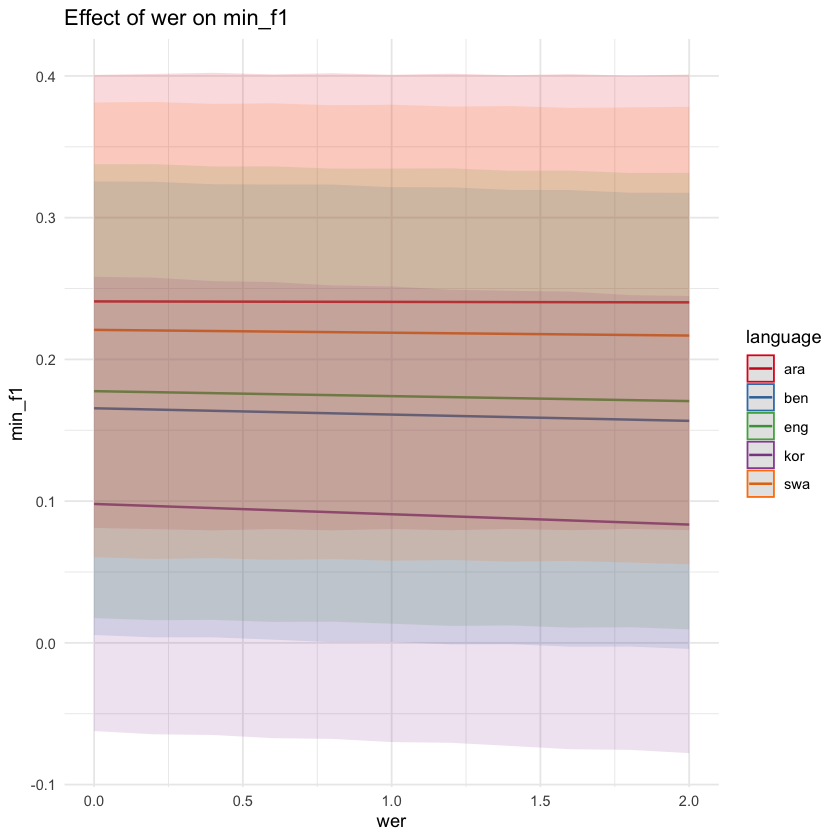

In [13]:
ggpredict(mixed.lmer, terms = c("wer", "language"), type = "re") %>% 
   plot() +
   labs(x = "wer", y = "min_f1", title = "Effect of wer on min_f1") + 
   theme_minimal()